<a href="https://colab.research.google.com/github/Gil135/analise_de_dados_com_python/blob/main/ML_KNN_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BIG DATA E ANALYTICS  2-2020** 



Aprendizagem de Máquina em Mineração de Dados

ML - KNN - Diabetes

Utilizaremos o notebook com script disponibilizado pelo professor para analise de dados de pacientes com diabetes.

In [19]:
#Importando a bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [20]:
#importando o KNN
from sklearn.neighbors import KNeighborsClassifier

In [21]:
#importando o dataset hospedado no github https://github.com/Gil135/analise_de_dados_com_python
basecsv=pd.read_csv("https://raw.githubusercontent.com/Gil135/analise_de_dados_com_python/main/diabetes.csv")

In [22]:
#titulo das colunas
basecsv.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
# 5 ultimas linhas do dataset
basecsv.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [24]:
#tipos
basecsv.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [25]:
#renomeado as colunas e a variavel para ajustar ao codigo existente
#glucose -> x1
#Age -> x2
#Outcome -> Y
baseDados=basecsv.rename(columns={"Pregnancies":"Pregnancies","Glucose":"X1","BloodPressure":"BloodPressure","SkinThickness":"SkinThickness","Insulin":"Insulin","BMI":"BMI","DiabetesPedigreeFunction":"DiabetesPedigreeFunction","Age":"X2","Outcome":"Y"})

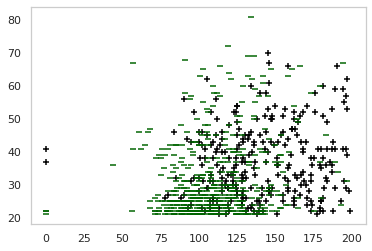

In [26]:
h = .1
x_min, x_max = baseDados.X1.min() -1, baseDados.X1.max() +1
y_min, y_max = baseDados.X2.min() -1, baseDados.X2.max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = '+') 
plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '_') 

In [27]:
X = baseDados[['X1', 'X2']]
Y = baseDados.Y
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [28]:
KNN.predict(X)

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,

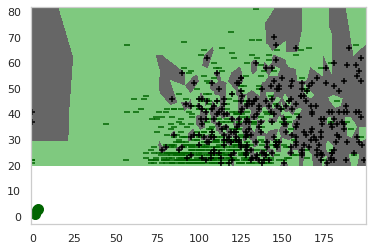

In [29]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X,Y)

Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = KNN.predict(X)
plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '_') 
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = '+') 

plt.scatter([2.5],[2.5], s = 100 , c = 'darkgreen' if KNN.predict([[2.5,2.5]]) == 0 else 'black')
plt.scatter([1.5],[1.0], s = 100 , c = 'darkgreen' if KNN.predict([[1.5,1.0]]) == 0 else 'black')
plt.scatter([3.5],[3.0], s = 100 , c = 'darkgreen' if KNN.predict([[3.5,3.0]]) == 0 else 'black')

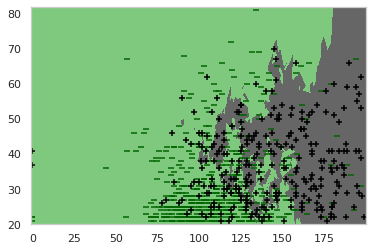

In [30]:
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X,Y)

Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = KNN.predict(X)
plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '_') 
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = '+') 

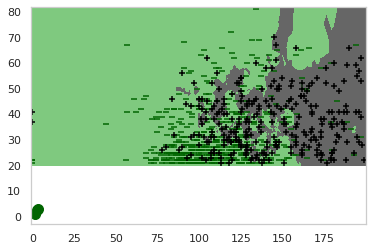

In [31]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X,Y)

Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = KNN.predict(X)
plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '_') 
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = '+') 

plt.scatter([2.5],[2.5], s = 100 , c = 'darkgreen' if KNN.predict([[2.5,2.5]]) == 0 else 'black')
plt.scatter([1.5],[1.0], s = 100 , c = 'darkgreen' if KNN.predict([[1.5,1.0]]) == 0 else 'black')
plt.scatter([3.5],[3.0], s = 100 , c = 'darkgreen' if KNN.predict([[3.5,3.0]]) == 0 else 'black')

In [32]:
from sklearn.model_selection import cross_val_score
KNN_cv = KNeighborsClassifier(n_neighbors=1)

cv_scores = cross_val_score(KNN_cv, X, Y, cv=5)#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.63636364 0.62337662 0.66883117 0.71895425 0.69281046]
cv_scores mean:0.6680672268907563


In [33]:
from sklearn.model_selection import cross_val_score
KNN_cv = KNeighborsClassifier(n_neighbors=3)

cv_scores = cross_val_score(KNN_cv, X, Y, cv=5)#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.66883117 0.66883117 0.7012987  0.75163399 0.67973856]
cv_scores mean:0.6940667175961293


In [34]:
from sklearn.model_selection import cross_val_score
KNN_cv = KNeighborsClassifier(n_neighbors=5)

cv_scores = cross_val_score(KNN_cv, X, Y, cv=5)#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


[0.72077922 0.71428571 0.70779221 0.79738562 0.7124183 ]
cv_scores mean:0.7305322128851541


In [35]:
from sklearn.model_selection import cross_val_score
KNN_cv = KNeighborsClassifier(n_neighbors=7)

cv_scores = cross_val_score(KNN_cv, X, Y, cv=5)#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.72077922 0.70779221 0.70779221 0.78431373 0.74509804]
cv_scores mean:0.7331550802139037


In [36]:
from sklearn.model_selection import cross_val_score
KNN_cv = KNeighborsClassifier(n_neighbors=9)

cv_scores = cross_val_score(KNN_cv, X, Y, cv=5)#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.73376623 0.7012987  0.69480519 0.79084967 0.7254902 ]
cv_scores mean:0.7292419998302351
